📌 Задача 1: Разведка данных и обработка пропусков
Датасет: Titanic (классика для новичков).
Цель:

Загрузить данные (train.csv).

Проверить типы данных и наличие пропусков в колонках Age, Cabin, Embarked.

Заполнить пропуски в Age медианным значением, в Embarked — модой.

Визуализировать количество пропусков через heatmap (используйте seaborn для красоты).

Описание данных:

survival	- выживание	0 = Нет, 1 = Да

pclass	- какой уровень класса комфорта в билете 1 = "Первый", 2 = "Второй" , 3 = "Третий"

sex - пол

Age	- возраст в годах

sibsp	- братья, сестры / супруги на борту Titanic

parch	- родители / дети на борту Titanic

ticket - номер билета

fare - Стоимость проезда для пассажиров

cabin	- номер каюты

embarked - порт посадки	C = Шербур, Q = Квинстаун, S = Саутгемптон

In [15]:
import pandas as pd

url =  "https://raw.githubusercontent.com/kseniyamao/deep_seek_tasks/main/train.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Мы видим пропуски в переменных Age, Cabin, Embarked. Age - число с плавающей точкой. Cabin, Embarked - объекты.

In [17]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Заполним пропуски в Age медианным значением.

In [18]:
df.Age.median()

28.0

In [19]:
df.Age = df.Age.fillna(df.Age.median())

In [20]:
df.Embarked.mode()

,Embarked
0,S


In [21]:
df.Embarked = df.Embarked.fillna(df.Embarked.mode()[0])

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

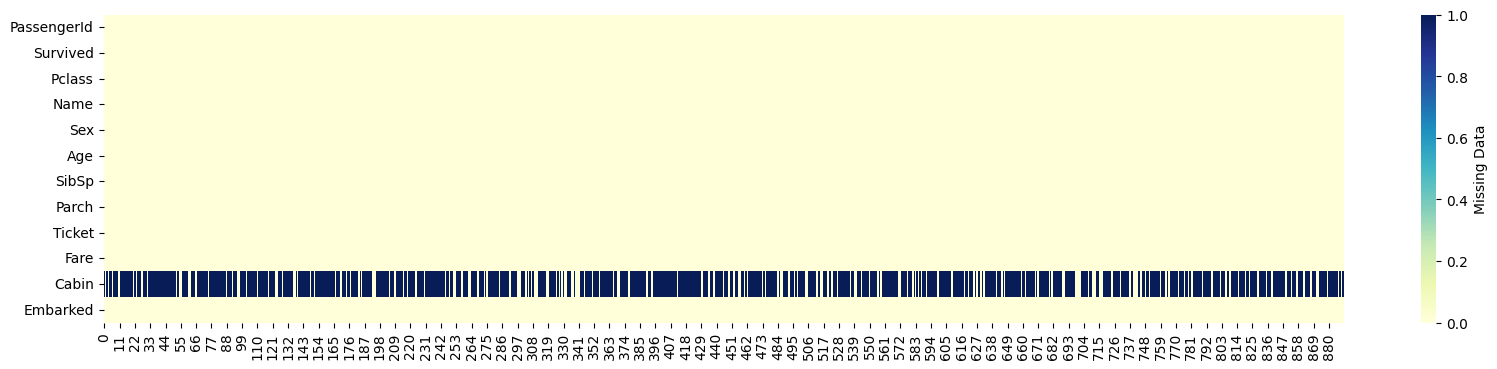

In [25]:
plt.figure(figsize=(20,4))
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})